# Dynamic Programming Problems

- Knapsack Problem: Optimize the total value in a bag while adhering to weight constraints.
- Longest Common Subsequence (LCS): Find the longest subsequence common to two sequences.
- Matrix Chain Multiplication: Minimize the number of scalar multiplications in matrix multiplication.
- Edit Distance: Find the minimum number of edits required to convert one string into another.

# Memoization (Top-down)

Explanation:
	• The function recursively calls itself, calculating the Fibonacci number for n-1 and n-2.
	• Results are stored in a dictionary memo, so the same Fibonacci number is not computed multiple times.
This approach reduces time complexity from O(2^n) to O(n).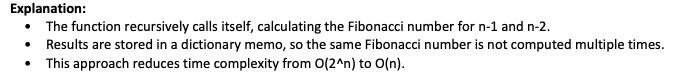

## Sudo Code


1. Create a recursive function.
2. Cache the results of subproblems using a memoization table (e.g., dictionary).
3. Before solving a subproblem, check if it has already been solved.
4. If not, solve it recursively and store the result.
5. Return the cached result when needed.

In [ ]:
def fibonacci_memo(n, memo={}):
    # Base cases
    if n <= 1:
        return n
    
    # If the value has already been calculated, return it from memo
    if n in memo:
        return memo[n]
    
    # Calculate Fibonacci of n
    memo[n] = fibonacci_memo(n - 1, memo) + fibonacci_memo(n - 2, memo)
    
    return memo[n]
# Example usage:
print(fibonacci_memo(10))  # Output: 55


# Tabulation (Bottom-up)

Explanation:
	• We start by initializing an array fib where fib[0] and fib[1] are already defined.
	• We then build the solution from smaller subproblems (fib[2], fib[3], ..., fib[n]) up to the desired Fibonacci number.
The time complexity is O(n), and the space complexity is also O(n), but can be optimized to O(1) by storing only the last two values in the sequence.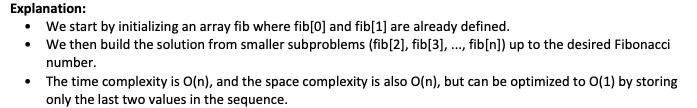

## Sudo code

1. Identify and define the state of each subproblem.
2. Initialize the DP table with base case values.
3. Iterate through all subproblems in a defined order.
4. Build solutions for larger subproblems based on smaller subproblems.
5. Retrieve the final result from the table.

In [ ]:
def fibonacci_tabulation(n):
    if n <= 1:
        return n
    
    # Initialize base values
    fib = [0] * (n + 1)
    fib[1] = 1
    
    # Build the table from the bottom up
    for i in range(2, n + 1):
        fib[i] = fib[i - 1] + fib[i - 2]
    
    return fib[n]
# Example usage:
print(fibonacci_tabulation(10))  # Output: 55


# Knapsack Problem

Explanation:
	• We build a table dp where each entry dp[i][w] represents the maximum value achievable with the first i items and weight w.
	• We either exclude the current item (dp[i-1][w]) or include it (dp[i-1][w - weight[i-1]] + value[i-1]), depending on which gives the maximum value.
The final answer is found in dp[n][capacity], which represents the maximum value we can obtain with the given capacity.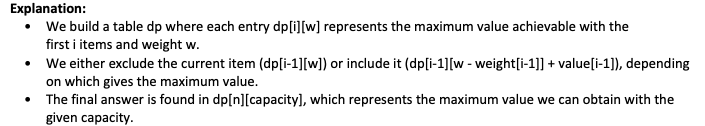

In [2]:
def knapsack(values, weights, capacity):
    n = len(values)
    
    # Create a 2D DP array to store the maximum value for each weight capacity
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    print(dp)
    
    # Build the DP table in bottom-up fashion
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]
    
    return dp[n][capacity]
# Example usage:
values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50
print(knapsack(values, weights, capacity))  # Output: 220


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
220


# Decode ways

To decode a message, digits must be grouped and then mapped back into letters using the reverse of the mapping above. There may be multiple ways to decode a message. For example, "1012" can be mapped into:

"JAB" with the grouping (10 1 2)
"JL" with the grouping (10 12)
The grouping (1 01 2) is invalid because 01 cannot be mapped into a letter since it contains a leading zero.

Given a string s containing only digits, return the number of ways to decode it. You can assume that the answer fits in a 32-bit integer.

In [1]:
def numDecodings(s: str) -> int:
    if not s or s[0] == '0':
        return 0
    
    n = len(s)
    dp = [0] * (n + 1)
    
    # Base cases
    dp[0] = 1  # There's one way to decode an empty string.
    dp[1] = 1  # There's one way to decode if the first character is not '0'.
    
    for i in range(1, n):
        # Check if the single character is valid
        if s[i] != '0':
            dp[i+1] += dp[i]
        
        # Check if the two characters form a valid number
        if 10 <= int(s[i-1:i+1]) <= 26:
            dp[i+1] += dp[i-1]
    
    return dp[n]



5.0